# HR Analytics : Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
## Features
- enrollee_id : (idx, 이산) 후보자 고유 ID
- city: (범주) 도시 코드
- city_ development _index : (이산) 도시 개발  지수
- gender: (범주) 후보자의 성별
- relevent_experience: (범주) 관련 경험 유/무
- enrolled_university: (범주) 대학 입학 여부
- education_level: (범주) 지원자의 교육 수준
    - Primary School    초등학교 졸업
    - High School       중/고등학교 졸업
    - Graduate          학사
    - Masters           석사
    - Phd               박사
- major_discipline : (범주) 주전공
- experience: (범주) 경력(년)
- company_size: (범주) 현재 회사의 직원 수
- company_type : (범주) 현재 회사 타입
    - Pvt Ltd 비상장회사
    - Funded Startup 투자받은 스타트업
    - Public Sector 공기업
    - Early Stage Startup 초기 스타트업
    - NGO  non-governmental organization 비정부기구
- last_new_job: (범주) 현재 직장 직전 공백기
- training_hours: (범주) 교육이수시간
- target: 이직희망여부 0 – 이직을 찾고 있지 않음, 1 – 이직을 찾고 있음

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
test = pd.read_csv('aug_test.csv')
train = pd.read_csv('aug_train.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
# submission.head()

## 한글 처리

In [5]:
mpl.get_cachedir()

'C:\\Users\\GREEN\\.matplotlib'

In [6]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'malg' in f.name.lower()]

[('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf')]

In [7]:
mpl.matplotlib_fname()

'C:\\Users\\GREEN\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [8]:
font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.unicode_minus'] = False

## EDA
- 참고: https://3months.tistory.com/325

In [9]:
# 컬럼명 번역
# col_to_kor = {
#     'enrollee_id' : '고유_ID',
#     'city': '도시코드',
#     'city_development_index' : '도시개발지수(scaled)',
#     'gender': '성별',
#     'relevent_experience': '관련경험',
#     'enrolled_university': '대학유형(있는 경우)',
#     'education_level': '학력',
#     'major_discipline' : '전공',
#     'experience': '연단위_경력',
#     'company_size': '현재_직장_직원_수',
#     'company_type' : '현재_직장_고용주_유형',
#     'last_new_job': '현재_직장_직전_공백기',
#     'training_hours': '교육이수시간',
#     'target': '이직_희망여부'
# }
# data.rename(columns=col_to_kor, inplace=True)

In [10]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [12]:
# 데이터의 Null 값을 체크
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [13]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [14]:
# 수치형(이산형) 데이터 확인
# category_feature
category_feature = ['gender','relevent_experience', 'enrolled_university',
                    'education_level', 'major_discipline', 'experience',
                    'company_size', 'company_type', 'last_new_job']
numerical_feature = ['city_development_index','training_hours']

C:\Users\GREEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


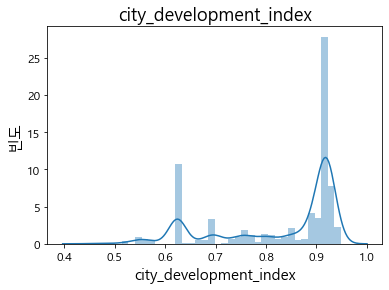

C:\Users\GREEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


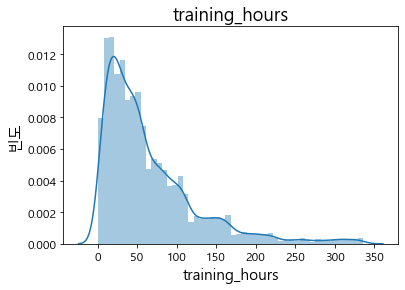

In [15]:
for nf in numerical_feature:
    sns.distplot(train.loc[train[nf].notnull(), nf])
#     sns.distplot(train[nf])
    plt.ylabel('빈도')
    plt.title(nf)
    plt.show()

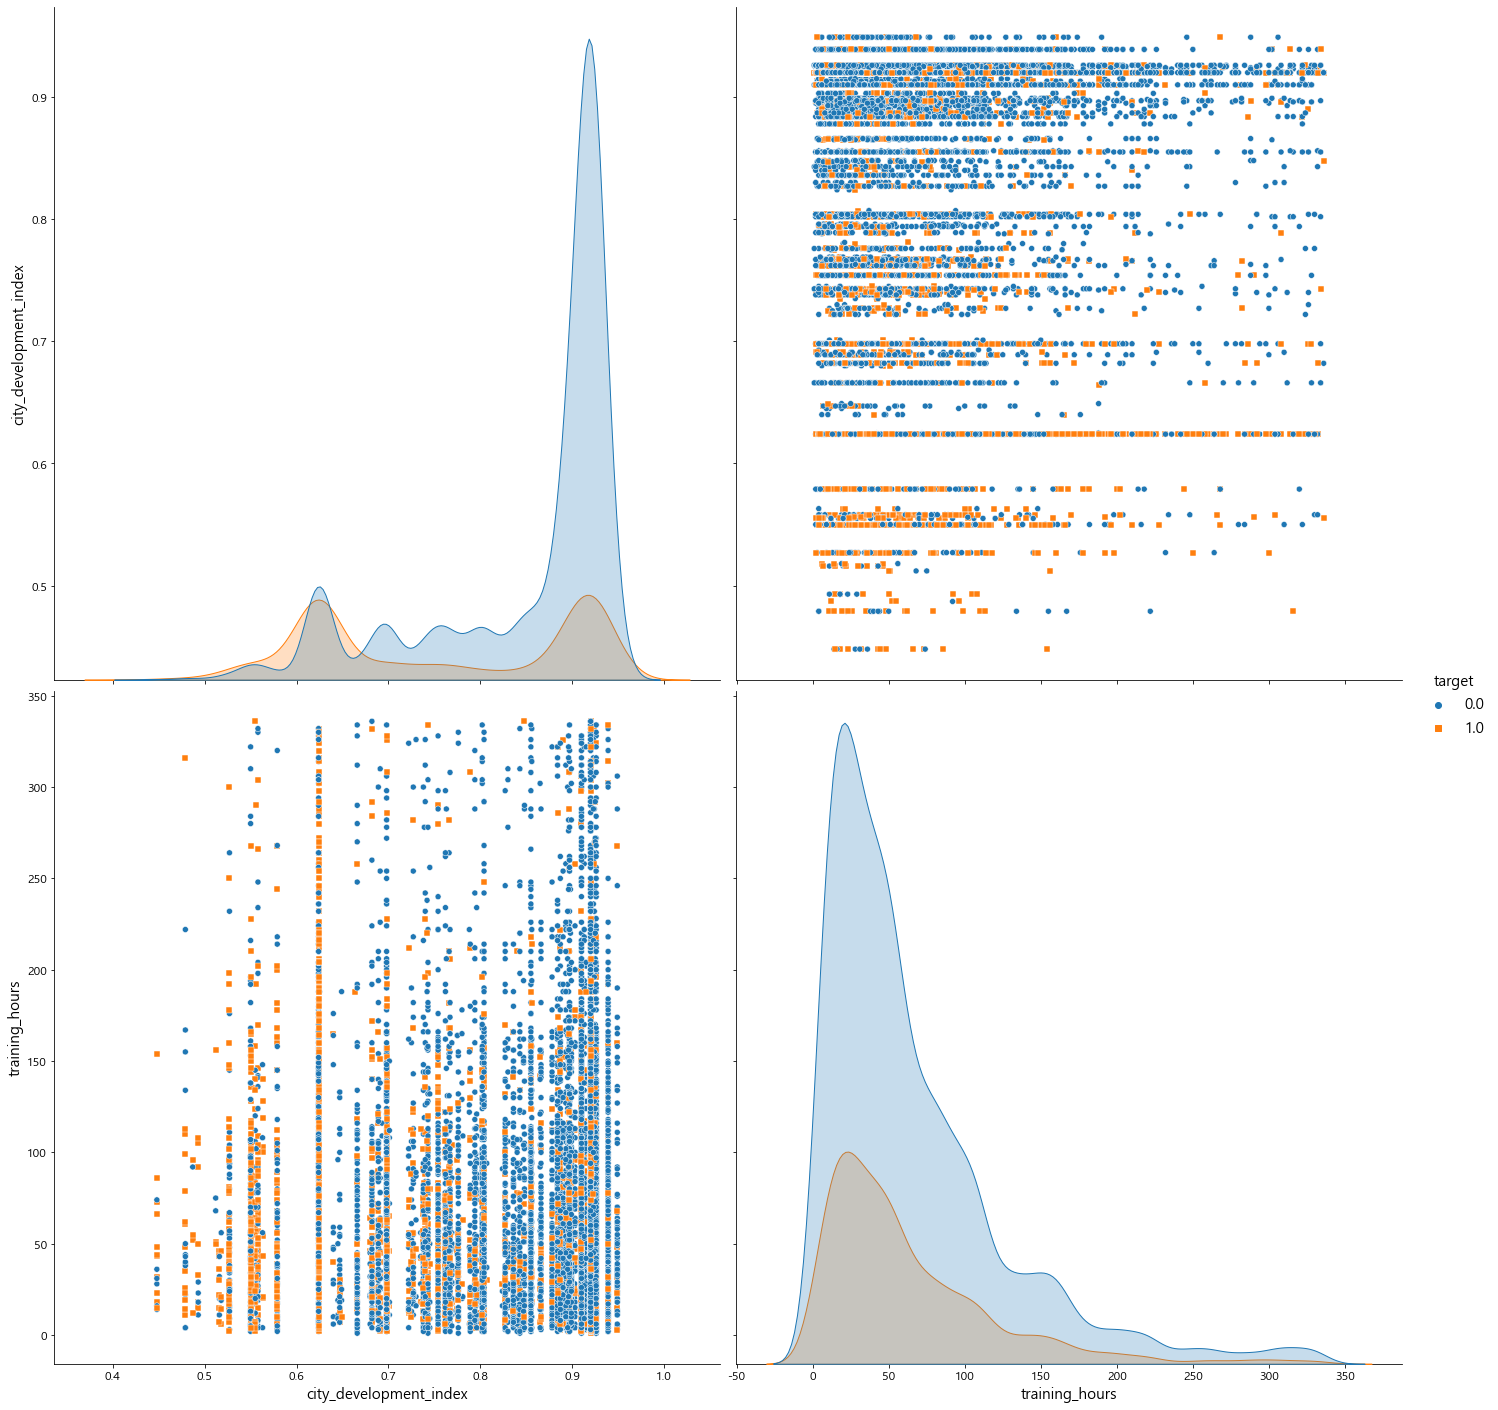

In [16]:
# numeric변수와 target과의 관계
diff = ['city_development_index', 'training_hours']

sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff,markers=["o", "s"], height=10)
# sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff, kind = 'hist', height=10)
plt.show()

In [17]:
# 범주형 데이터 확인
for c in train.columns:
    if c == 'enrollee_id' or c == 'city_development_index' or c == 'training_hours' or c == 'target':
        continue
    print(f'😎column : {c}')
    # columns별 unique, Nan 비율
#     print(train[c].value_counts(normalize=True, dropna=False))
    print(train[c].value_counts(dropna=False))

😎column : city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
😎column : gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64
😎column : relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
😎column : enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64
😎column : education_level
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64
😎column : major_discipline
STEM               14492
NaN                 2813
Humanities           669
Other                381
Business 

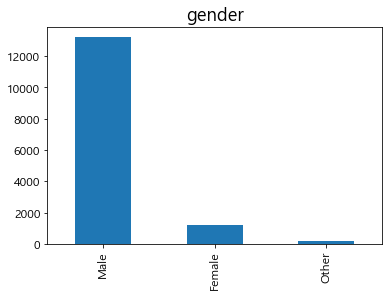

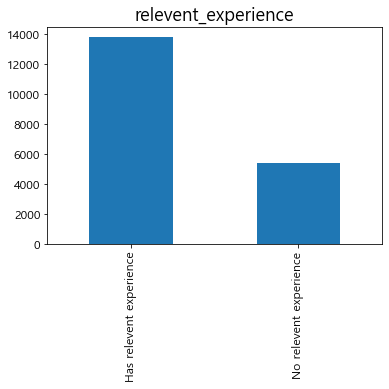

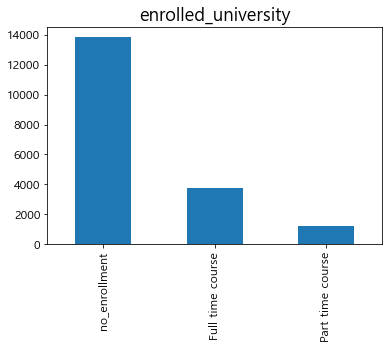

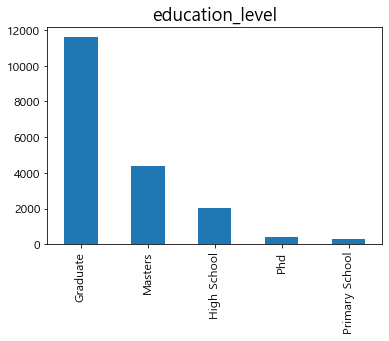

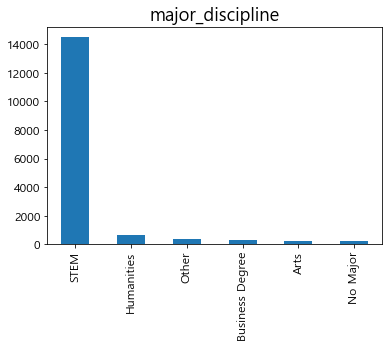

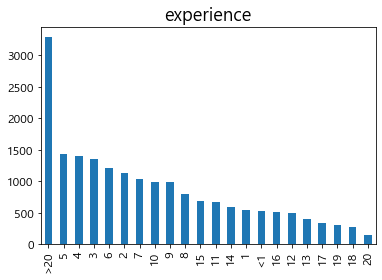

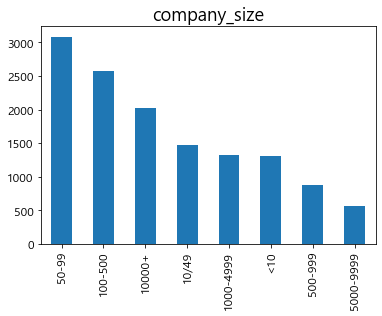

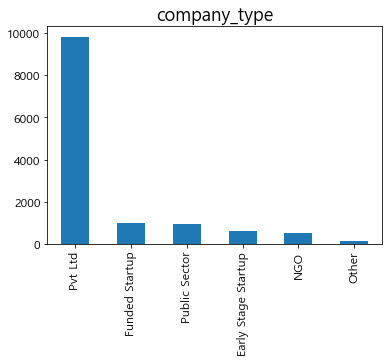

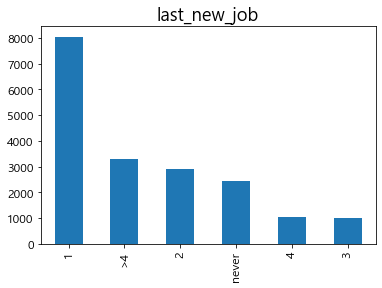

In [18]:
# 범주형 데이터 시각화
for c in train.columns:
    if c == 'enrollee_id' or c == 'city_development_index' or c == 'training_hour' or c == 'target' or c == 'training_hours' or c == 'city':
        continue
    train[c].value_counts().plot(kind='bar')
    plt.title(c)
    plt.show()

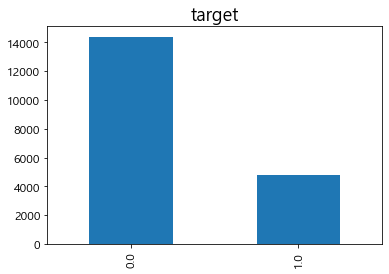

In [19]:
# y값('target')
train['target'].value_counts().plot(kind='bar')
plt.title('target')
plt.show()

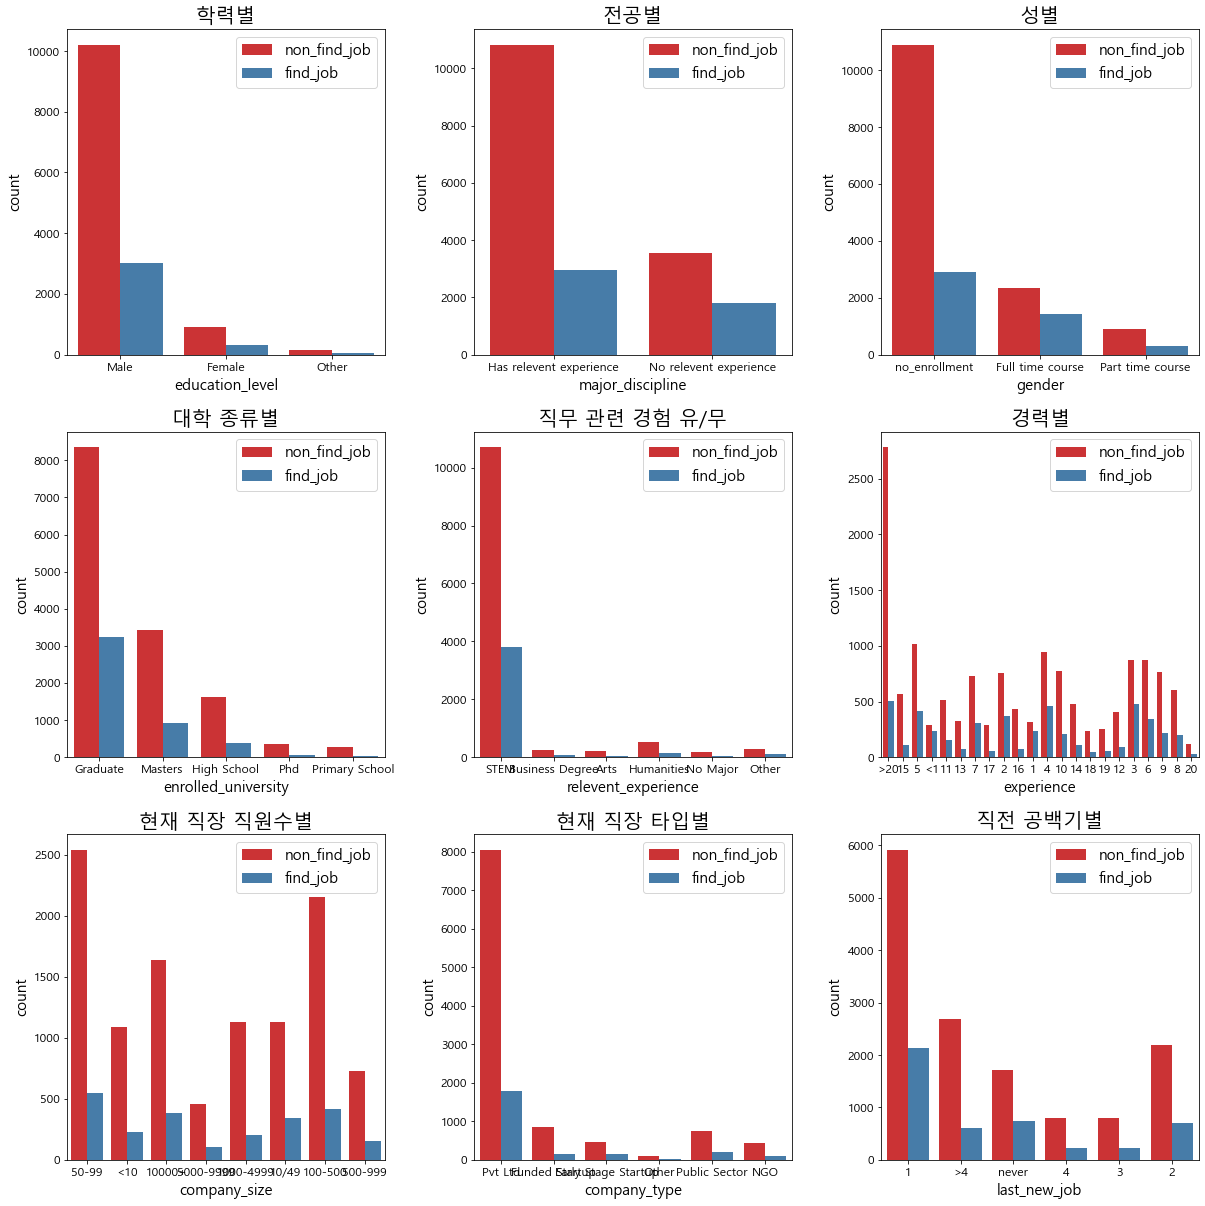

In [20]:
# 우상님 코드..! 👍👍
# 명목형(범주형) 변수와 target과의 관계
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17, 17))

sns.set_palette("Set1") #Pastel2, Dark2, Accent, Set1
axx = axes.flatten()
i = 0

for cf in category_feature:
    sns.countplot(x = cf, hue = 'target', data = train, ax = axx[i])
    i+=1

axes[0,0].set_title('학력별', fontsize=20)
axes[0,0].set_xlabel('education_level', fontsize=15)
axes[0,0].legend(['non_find_job', 'find_job'])

axes[0,1].set_title('전공별', fontsize=20)
axes[0,1].set_xlabel('major_discipline', fontsize=15)
axes[0,1].legend(['non_find_job', 'find_job'])

axes[0,2].set_title('성별', fontsize=20)
axes[0,2].set_xlabel('gender', fontsize=15)
axes[0,2].legend(['non_find_job', 'find_job'])

axes[1,0].set_title('대학 종류별', fontsize=20)
axes[1,0].set_xlabel('enrolled_university', fontsize=15)
axes[1,0].legend(['non_find_job', 'find_job'])

axes[1,1].set_title('직무 관련 경험 유/무', fontsize=20)
axes[1,1].set_xlabel('relevent_experience', fontsize=15)
axes[1,1].legend(['non_find_job', 'find_job'])

axes[1, 2].set_title('경력별', fontsize=20)
axes[1, 2].set_xlabel('experience', fontsize=15)
axes[1, 2].legend(['non_find_job', 'find_job'])

axes[2, 0].set_title('현재 직장 직원수별', fontsize=20)
axes[2, 0].set_xlabel('company_size', fontsize=15)
axes[2, 0].legend(['non_find_job', 'find_job'])

axes[2, 1].set_title('현재 직장 타입별', fontsize=20)
axes[2, 1].set_xlabel('company_type', fontsize=15)
axes[2, 1].legend(['non_find_job', 'find_job'])

axes[2, 2].set_title('직전 공백기별', fontsize=20)
axes[2, 2].set_xlabel('last_new_job', fontsize=15)
axes[2, 2].legend(['non_find_job', 'find_job'])

plt.tight_layout()
plt.show()

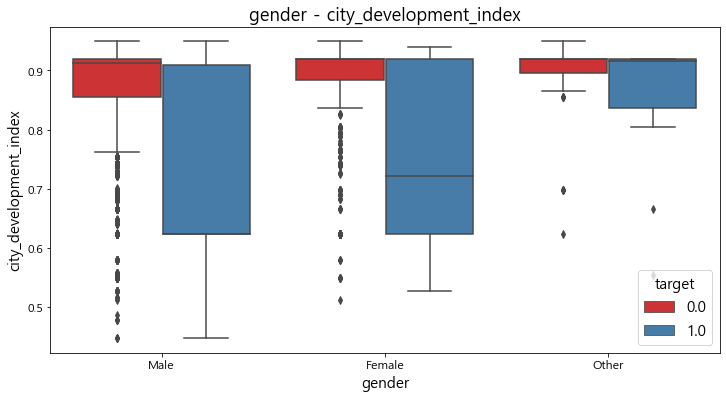

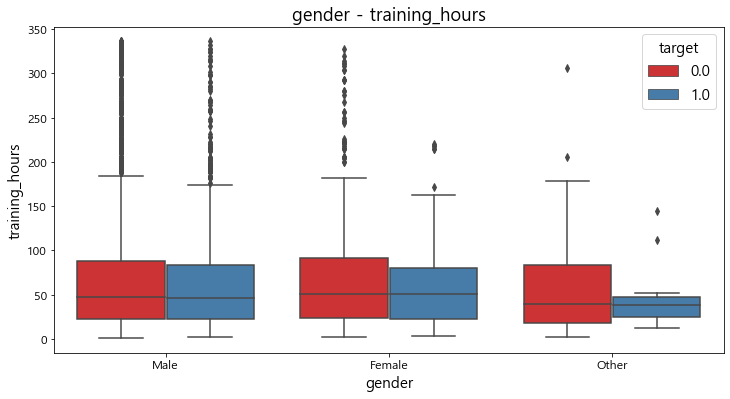

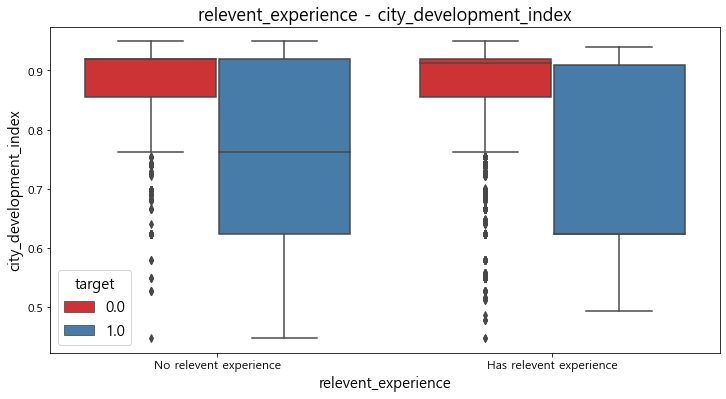

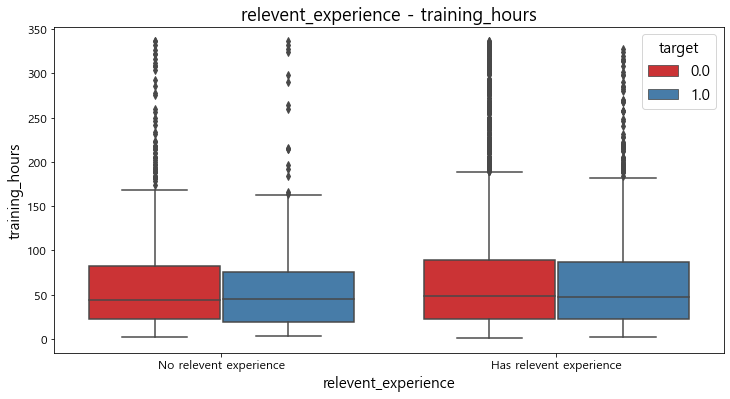

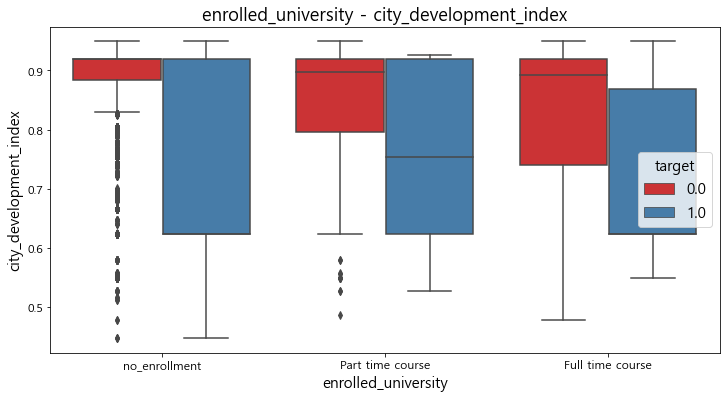

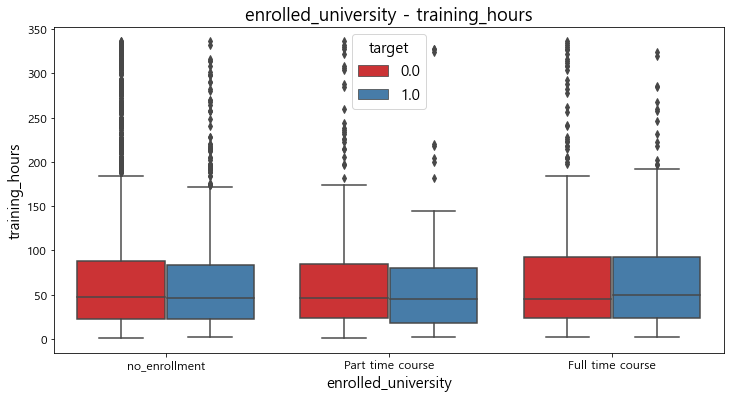

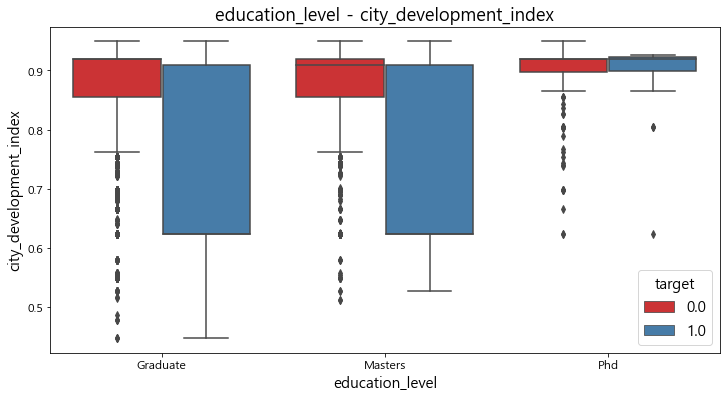

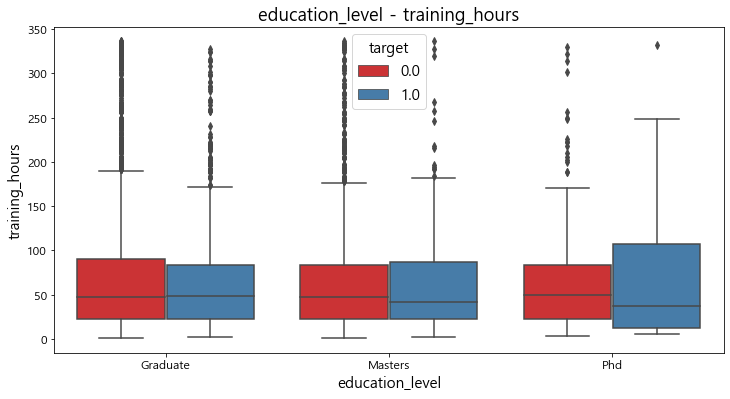

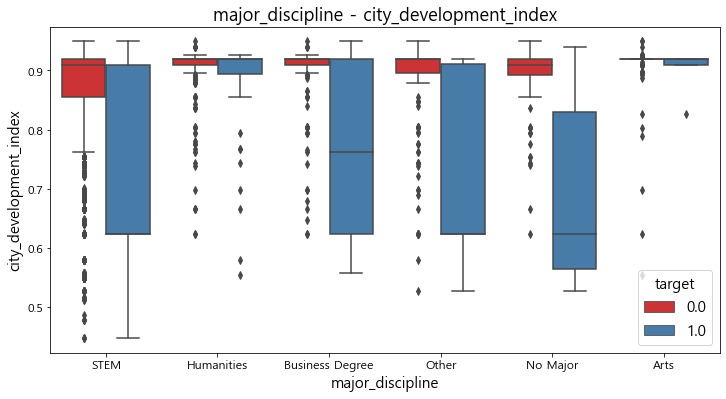

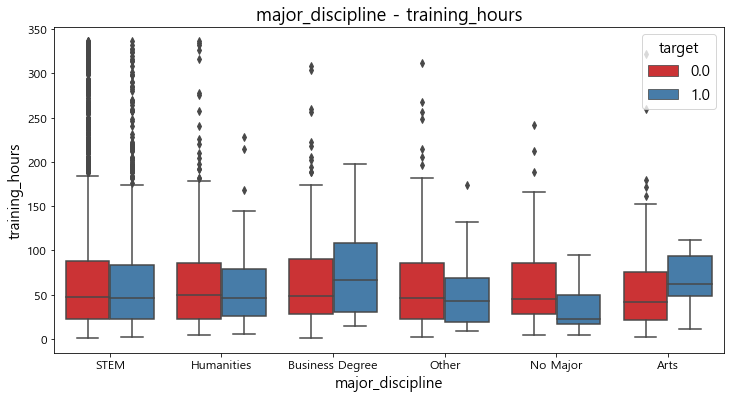

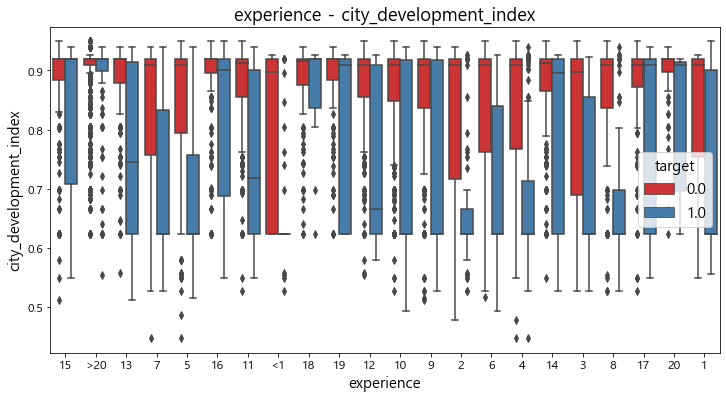

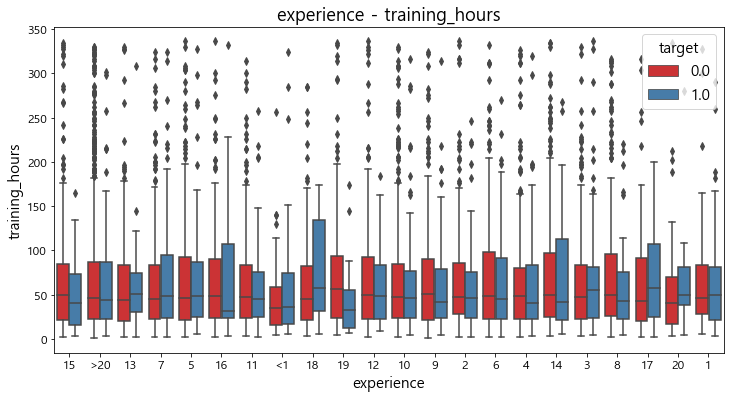

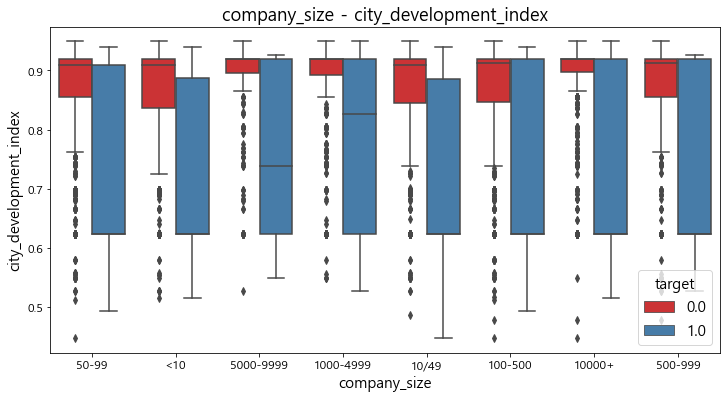

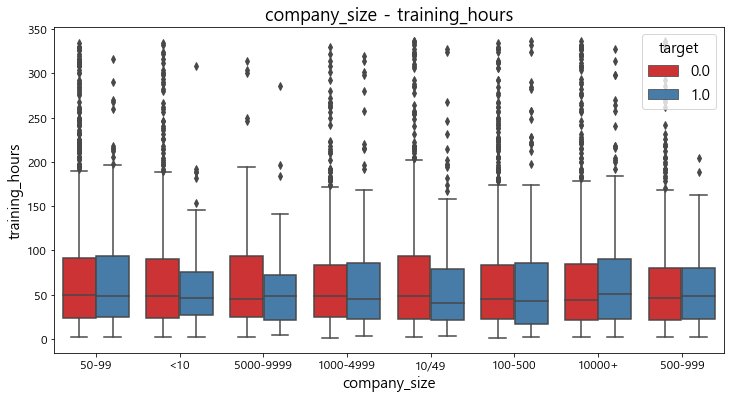

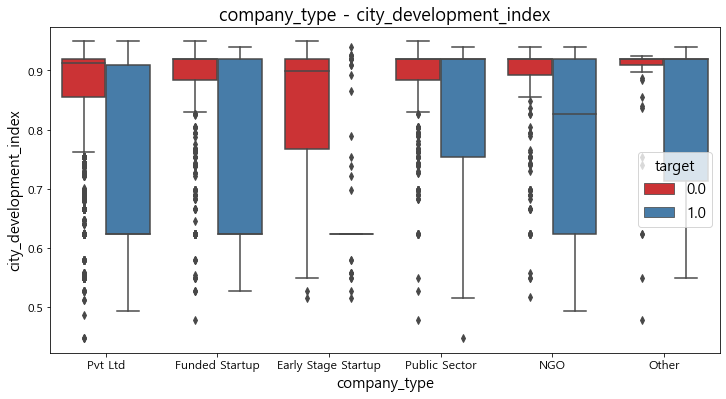

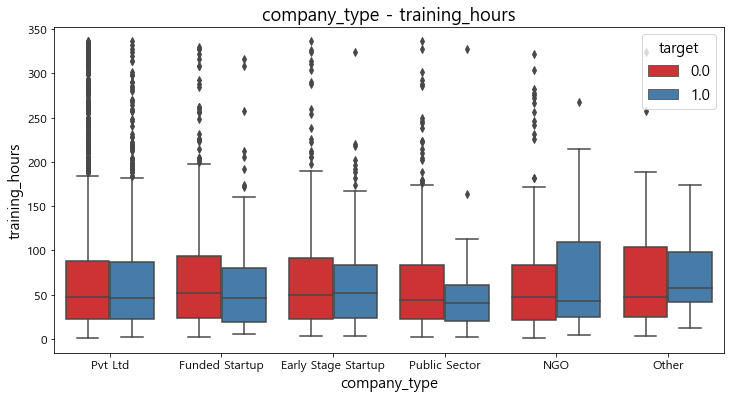

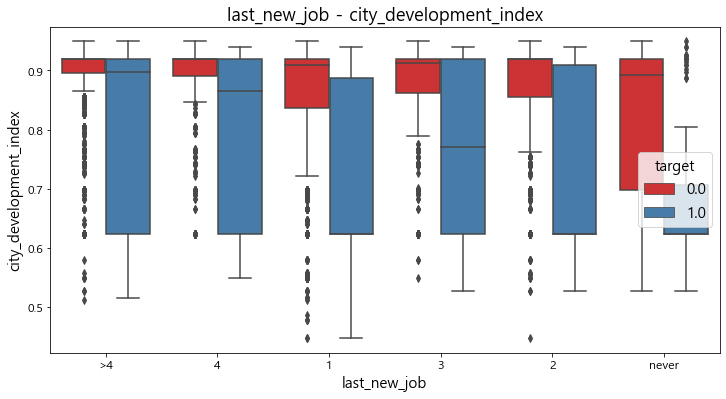

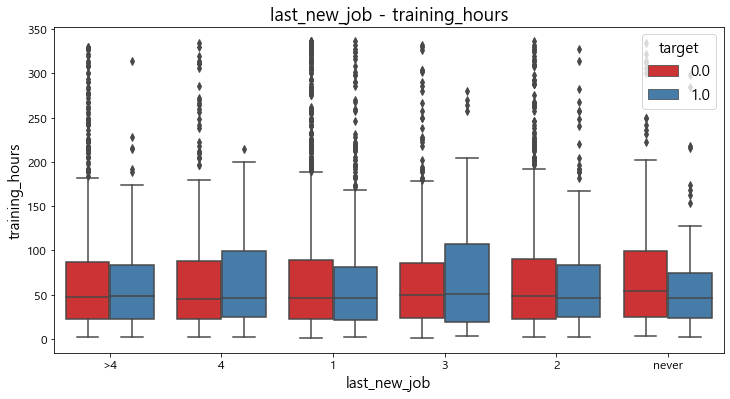

In [21]:
# 수치형(이산형), 명목형(범주형) 변수 간의 관계 탐색
for cf in category_feature:
    for nf in numerical_feature:
        plt.figure(figsize=(12,6))
        sns.boxplot(x=cf, y=nf, hue='target', data=train.dropna())
        plt.title(f"{cf} - {nf}")
        plt.show()

### 데이터 전처리
- duplicate 확인
- null값 처리
- outlier 처리

In [22]:
# 중복값 확인 -> 없음!
du = train.duplicated()
print(du.sum())
train[du]

0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [23]:
# (우선) Null값 모두 삭제
# -> 삭제한 데이터로 데이터별 중요도 파악후 컬럼별 결측치 처리를 생각해보자
# drop_na_train = train.dropna(axis=0)
# print(len(drop_na_train))
# 특정 행 또는 열을 대상으로 결측값이 들어있으면 제거
# (delete specific row or column with missing values) : df[ ].dropna()
print(len(train))
train = train.dropna(axis=0)
print('->',len(train))

19158
-> 8955


In [24]:
# experience를 Categorical Type으로 변환
# 다른 변수도 가능할까? & 굳이 변경하는게 편할까?
train['experience'] = pd.Categorical(train['experience'], categories = list(train['experience'].unique()))
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8955 non-null   int64   
 1   city                    8955 non-null   object  
 2   city_development_index  8955 non-null   float64 
 3   gender                  8955 non-null   object  
 4   relevent_experience     8955 non-null   object  
 5   enrolled_university     8955 non-null   object  
 6   education_level         8955 non-null   object  
 7   major_discipline        8955 non-null   object  
 8   experience              8955 non-null   category
 9   company_size            8955 non-null   object  
 10  company_type            8955 non-null   object  
 11  last_new_job            8955 non-null   object  
 12  training_hours          8955 non-null   int64   
 13  target                  8955 non-null   float64 
dtypes: category(1), float64

### Model
- 로지스틱 회귀
- RF
- ExtraTreesRegressor?

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# cross validation 하기 전에 encoding

In [26]:
# 모델 학습 및 예측을 진행하기 전, 문제와 정답 데이터 분리
# https://m.blog.naver.com/PostView.nhn?blogId=nomadgee&logNo=220812476823&proxyReferer=https:%2F%2Fwww.google.com%2F
# https://everyday-image-processing.tistory.com/82
# https://hong-yp-ml-records.tistory.com/28
train = train.sample(frac = 1, random_state = 0)
X_train = train.drop(['target'], axis = 1)
y_train = train['target']

In [33]:
# # 최종모델을 선택하고 사용할 피쳐를 선택하기에 앞서 cross validation을 통해 어떠한 경우가 가장 좋은 성능을 내는지 판단하는 과정
# def rmsle(predicted_values, actual_values):
#     predicted_values = np.array(predicted_values)
#     actual_values = np.array(actual_values)

#     log_predict = np.log(predicted_values + 1)
#     log_actual = np.log(actual_values + 1)

#     difference = log_predict - log_actual
#     difference = np.square(difference)
#     mean_difference = difference.mean()
#     score = np.sqrt(mean_difference)

#     return score

# rmsle_scorer = make_scorer(rmsle)

# validation_model = ExtraTreesRegressor(n_jobs = -1, random_state = 4)
# cv = KFold(2, shuffle=True, random_state=4)
# scores = cross_val_score(validation_model, X_train, y_train, cv=cv, scoring=rmsle_scorer)

# print("교차 검증 점수: {}". format(scores))
# print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

In [34]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# scores2 = cross_val_score(logreg, X_train, y_train)

# print(f'cross-val-score : {scores2}')
# print(f'cross-val-score.mean : {scores2.mean()}')

cross-val-score : [nan nan nan nan nan]
cross-val-score.mean : nan


In [38]:
# from sklearn import datasets
# iris = datasets.load_iris()
# print(iris.data)
# print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
